# HR Analytics: Job Change of Data Scientists

In [ ]:
https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

In [7]:
import zipfile
archive = 'archive.zip'
with zipfile.ZipFile(archive, 'r') as zip_file:
    zip_file.extractall('archive_unzip')
    
# еще много всего про архивы: https://pythonist.ru/raspakovka-fajlov-iz-zip-ili-tar-gz-s-pomoshhyu-python/

In [1]:
import pandas as pd

In [108]:
df = pd.read_csv('archive_unzip/aug_train.csv')

In [109]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [13]:
# Интересный аналог reindex и drop:

# Выбираем название всех столбцов
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [14]:
# Показываем все столбцы
df[['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target']]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [15]:
# Отказываемся от столбцов которые не нужны
df[['enrollee_id', 'city', 'company_type',
       'last_new_job', 'training_hours', 'target']]

,enrollee_id,city,company_type,last_new_job,training_hours,target
0,8949,city_103,NaN,1,36,1.0
1,29725,city_40,Pvt Ltd,>4,47,0.0
2,11561,city_21,NaN,never,83,0.0
3,33241,city_115,Pvt Ltd,never,52,1.0
4,666,city_162,Funded Startup,4,8,0.0
...,...,...,...,...,...,...
19153,7386,city_173,NaN,1,42,1.0
19154,31398,city_103,NaN,4,52,1.0
19155,24576,city_103,Pvt Ltd,4,44,0.0
19156,5756,city_65,Pvt Ltd,2,97,0.0


# Как быть с Wornings?

In [16]:
# Берем часть df и делаем из него новый датафрейм (хотя это всего лишь слайс)
df_city_40_female = df[(df.city == 'city_40') & (df.gender == 'Female')]

In [17]:
# Новый датафрейм можно открыть:
df_city_40_female

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
5625,18467,city_40,0.776,Female,Has relevent experience,no_enrollment,Masters,STEM,15,1000-4999,Pvt Ltd,2,25,0.0
6385,11547,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,2,10/49,Pvt Ltd,1,15,0.0
8032,24409,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,NaN,NaN,1,49,1.0
8046,27349,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,10/49,Pvt Ltd,never,19,1.0
9923,6702,city_40,0.776,Female,No relevent experience,Full time course,Graduate,Other,1,100-500,NaN,1,34,0.0
13871,17684,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,118,0.0


In [19]:
# Но при попытки добавить строку получим Ворнинг:
df_city_40_female['new_new'] = 99

C:\Users\roman\AppData\Local\Temp\ipykernel_9444\2145585580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_40_female['new_new'] = 99


In [20]:
# Для того, чтобы этого измбежать, нужно просто добавить copy - и тогда слайс, станет настоящим отдельным df
df_city_40_female = df[(df.city == 'city_40') & (df.gender == 'Female')].copy()
df_city_40_female['new_new_new'] = 99

# Как видим Warning не возникает !

# Пропуски в данных

In [22]:
df.isna()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,False,False,False,False,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,True,False,False,False
3,False,False,False,True,False,True,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,False,False,False,False,False,False,False,False,False,True,True,False,False,False
19154,False,False,False,False,False,False,False,False,False,True,True,False,False,False
19155,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19156,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [23]:
# Показывает процент пропусков по каждому столбцу
df.isna().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [25]:
# фильтруем
df.isna().mean().sort_values(ascending=False)

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
dtype: float64

In [26]:
# информация по столбцам, фичам или признакам:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [28]:
# если нужны только типы:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

# Типы переменных: непрерывные и категориальные

In [80]:
# Непрерывные от +inf до -inf, категориальные - номинативные...

df[['city_development_index', 'gender']]

,city_development_index,gender
0,0.920,Male
1,0.776,Male
2,0.624,NaN
3,0.789,NaN
4,0.767,Male
...,...,...
19153,0.878,Male
19154,0.920,Male
19155,0.920,Male
19156,0.802,Male


array([[<Axes: title={'center': 'city_development_index'}>]], dtype=object)

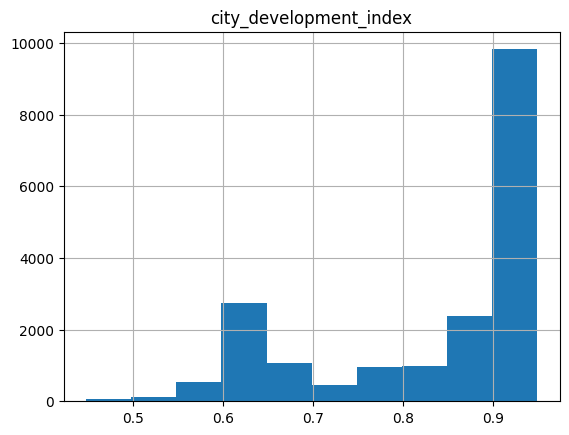

In [4]:
# Для непрерывной переменной можно построить гистограмму распределения:

df[['city_development_index']].hist()

In [82]:
# # Задаем для графики темную тему:
# # Link: https://matplotlib.org/stable/gallery/style_sheets/dark_background.html

# import numpy as np
# import matplotlib.pyplot as plt


# # plt.style.use('dark_background')

# df[['city_development_index']].hist()

# чтобы потом поменять - перезагрузка!


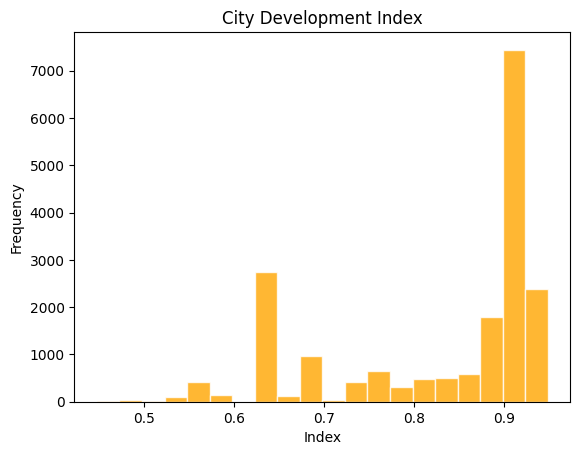

In [7]:
# Чтобы добавить подписи и вообще всё что нужно для презентации гистограммы:

# для того, чтобы нарисовать гистограмму, необходимо использовать метод hist() 
# для выбранных данных df[['city_development_index']] и передать этот метод основному 
# объекту рисунка (ax), используя метод set_title() для задания заголовка гистограммы:

import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('dark_background')

# загрузка данных
df = pd.read_csv('archive_unzip/aug_train.csv')
df = df['city_development_index']

# создание рисунка
plt.figure()

# построение гистограммы
plt.hist(df, bins=20, color='orange', alpha=0.8, edgecolor='white')

# задание заголовка гистограммы
plt.title('City Development Index')

# задание подписей осей
plt.xlabel('Index')
plt.ylabel('Frequency')

# отображение гистограммы
plt.show()

In [35]:
# Функция describe выводится только для непрервыных данных:

df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [10]:
df[['city_development_index', 'gender']]

,city_development_index,gender
0,0.920,Male
1,0.776,Male
2,0.624,NaN
3,0.789,NaN
4,0.767,Male
...,...,...
19153,0.878,Male
19154,0.920,Male
19155,0.920,Male
19156,0.802,Male


In [ ]:
# Для категориальных данных мы используем функции для описания, как устроена выборка:

In [11]:
df[['gender']].describe()

,gender
count,14650
unique,3
top,Male
freq,13221


In [12]:
df[['gender']].value_counts()

gender
Male      13221
Female     1238
Other       191
dtype: int64

# Фильтрация выбросов !

In [14]:
# Определяем 25 квантиль
df['city_development_index'].quantile(0.25)

0.74

In [15]:
q = df['city_development_index'].quantile(0.25)

In [16]:
# Для удобства задаем переменную

q

0.74

In [18]:
# Таким образом получаем 25% нашего датасета:

df[df['city_development_index'] < q]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
10,29452,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0
13,5826,city_21,0.624,Male,No relevent experience,NaN,NaN,NaN,2,NaN,NaN,never,24,0.0
14,8722,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,never,26,0.0
17,5764,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,2,5000-9999,Pvt Ltd,2,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,17191,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,never,48,1.0
19145,155,city_44,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,190,0.0
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19148,9212,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40,1.0


In [19]:
# Для того, чтобы убрать 5% самых малых или самых больших значений - задаем:

q = df['city_development_index'].quantile(0.05)

In [27]:
# Создадим новый df2 с копированием:
df2 = df[df['city_development_index'] >= q].copy()

array([[<Axes: title={'center': 'city_development_index'}>]], dtype=object)

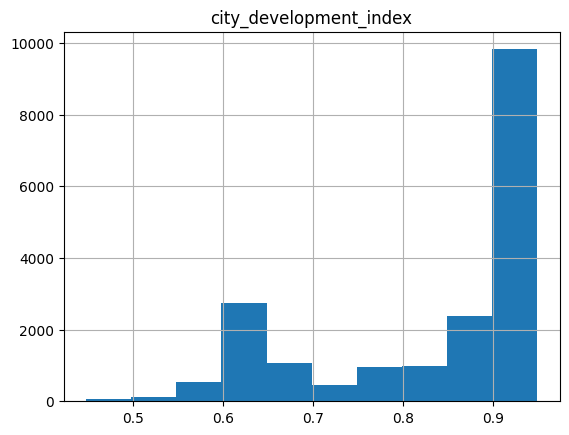

In [23]:
# Сравним гистограммы распределения:
# Для исходного столбца:
df[['city_development_index']].hist()


array([[<Axes: title={'center': 'city_development_index'}>]], dtype=object)

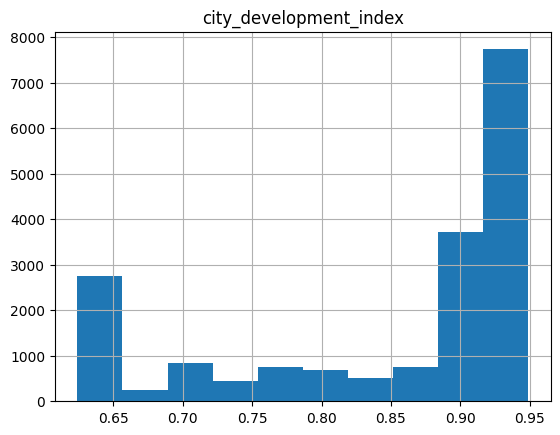

In [28]:
# Для измененного столбца:
df2[['city_development_index']].hist()

In [38]:
# Подрубим 5% минимальных и 5% максимальных значений:

q1 = df['city_development_index'].quantile(0.05)
q2 = df['city_development_index'].quantile(0.95)

In [39]:
df3 = df[df['city_development_index'].between(q1, q2)].copy()

array([[<Axes: title={'center': 'city_development_index'}>]], dtype=object)

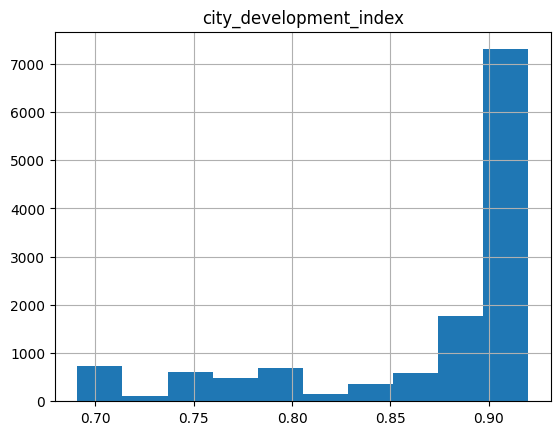

In [40]:
df3[['city_development_index']].hist()

array([[<Axes: title={'center': 'city_development_index'}>]], dtype=object)

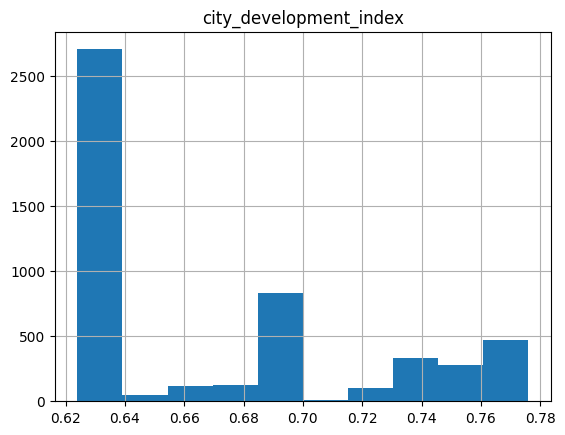

In [42]:
# В 0.9 - сосредоточено больше половины всех значений, для того чтобы убрать все эти значения надо урезать сверху до 0.7 данных
q1 = df['city_development_index'].quantile(0.05)
q2 = df['city_development_index'].quantile(0.3)

df4 = df[df['city_development_index'].between(q1, q2)].copy()

df4[['city_development_index']].hist()

# Сводники

In [16]:
# рассчитываем процент (долю) тех, кто хочет сменить работу:

# это уже сводник, но сводник без группировки - по всему датасету:
df['target'].mean()

# показано, что 25% всех во всем датасете хочет сменить работу

0.24934753105752167

In [50]:
# делаем группировку по полу для параметра target и получаем срденее значение:
df.groupby('gender')['target'].mean()

gender
Female    0.263328
Male      0.227819
Other     0.261780
Name: target, dtype: float64

In [52]:
# делаем группировку по полу для параметра target и получаем срденее значение + добавляем количество и среднее (.agg):

# это дает ответ на вопрос: кто и в каком количестве человек соответсвтуют target, то есть хотят поменять работу.

df.groupby('gender')['target'].agg(['count', 'mean'])

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780


In [54]:
# Но здесь необходимо учитывать потерю данных - nan

# Если мы зададим переменную по этому своднику:

t = df.groupby('gender')['target'].agg(['count', 'mean'])

# и посчитаем количество участников здесь всего:

t['count'].sum()

14650

In [57]:
# То это количество не будет совпадать с начальным количеством человек всего в df:

len(df)

19158

In [17]:
# Для того, чтобы этого избегать необходимо учитывать пропуски:

df.groupby('gender', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780
NaN,4508,0.308119


In [ ]:
# здесь мы получаем дополнительную строку, отражающую колиество nan, потерянное в прошлом 

In [18]:
# теперь: 
df.groupby('gender', dropna = False)['target'].agg(['count']).sum() == len(df)

count    True
dtype: bool

In [19]:
### Другой пример. Копируем ту же функцию, но с другой группировкой:

df.groupby('education_level', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


<Axes: xlabel='education_level'>

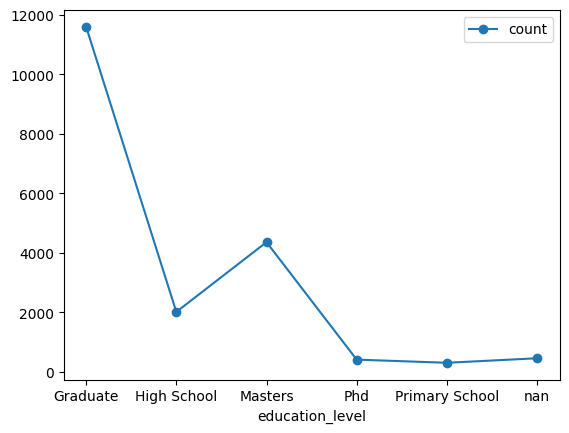

In [21]:
# Нарисуем график для значений:

df.groupby('education_level', dropna = False)['target'].agg(['count']).plot(marker = 'o')

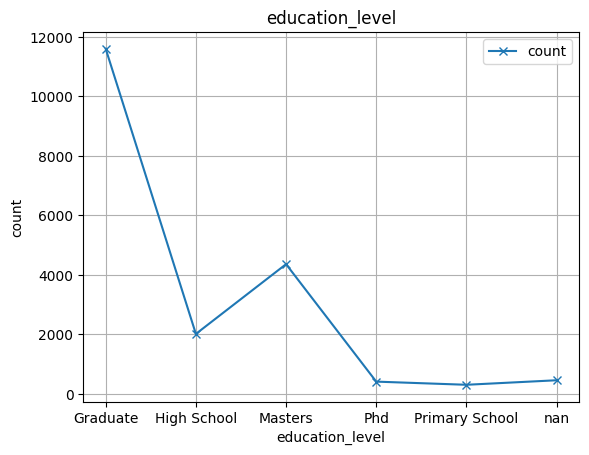

In [22]:
# Чтобы подписать ось y на графике и добавить крестики :

# Пример кода:
df.groupby('education_level', dropna = False)['target'].agg(['count']).plot(marker = 'x')

plt.ylabel('count')
plt.title('education_level')
plt.grid()


Text(0.5, 1.0, 'education_level')

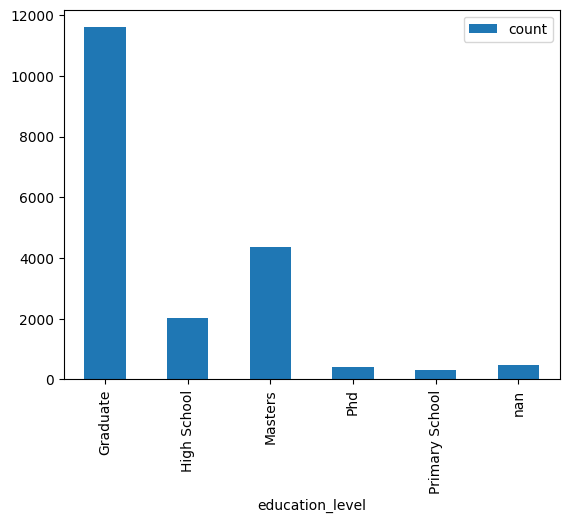

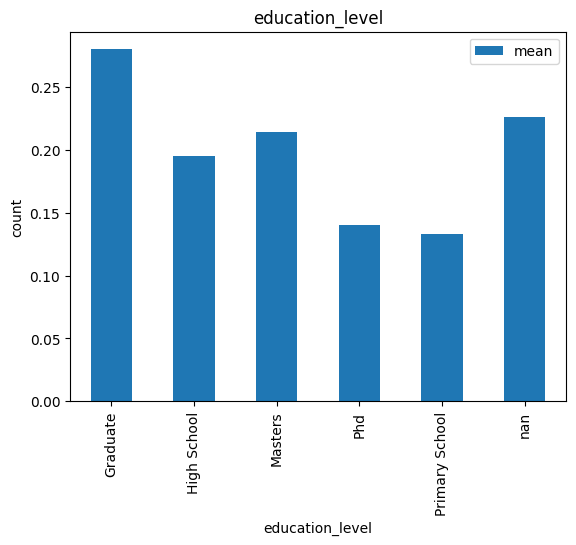

In [89]:
# Чтобы изменить тип графика на bar

# Пример кода:
df.groupby('education_level', dropna = False)['target'].agg(['count']).plot(kind = 'bar')
df.groupby('education_level', dropna = False)['target'].agg(['mean']).plot(kind = 'bar')

plt.ylabel('count')
plt.title('education_level')

# СВОДНИКИ ДЛЯ НЕПРЕРЫВНЫХ ПЕРЕМЕННЫХ

In [23]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [91]:
### Другой пример. Копируем ту же функцию, но с другой группировкой:

df.groupby('city_development_index', dropna = False)['target'].agg(['count', 'mean'])

# информация представляется не читаемой (много строк, без общей статистики):

,count,mean
city_development_index,,
0.448,17,0.647059
0.479,28,0.535714
0.487,5,0.800000
0.493,13,0.538462
0.512,5,0.600000
...,...,...
0.924,301,0.093023
0.925,171,0.140351
0.926,1336,0.099551


In [93]:
# Для того, чтобы анализировать непрерывную переменную - ее надо побить на интервалы:

pd.cut(df['city_development_index'], 5) 

# это пример того, как работает гистограмма - непрервыную переменную бъет на 5 интервалов - равных по длине

0        (0.849, 0.949]
1        (0.749, 0.849]
2        (0.548, 0.648]
3        (0.749, 0.849]
4        (0.749, 0.849]
              ...      
19153    (0.849, 0.949]
19154    (0.849, 0.949]
19155    (0.849, 0.949]
19156    (0.749, 0.849]
19157    (0.849, 0.949]
Name: city_development_index, Length: 19158, dtype: category
Categories (5, interval[float64, right]): [(0.447, 0.548] < (0.548, 0.648] < (0.648, 0.749] < (0.749, 0.849] < (0.849, 0.949]]

In [27]:
# такое разбиение на интервалы можно передать в переменную:

df['city_development_index_group'] = pd.cut(df['city_development_index'], 5) 

In [28]:
# сейчас уже можно сгруппировать по этой переменной и смотреть статистику по этим группам:

df.groupby('city_development_index_group', dropna = False)['target'].agg(['mean', 'count'])

,mean,count
city_development_index_group,,
"(0.447, 0.548]",0.578652,178
"(0.548, 0.648]",0.582651,3297
"(0.648, 0.749]",0.273381,1529
"(0.749, 0.849]",0.194459,1949
"(0.849, 0.949]",0.160262,12205


<Axes: xlabel='city_development_index_group'>

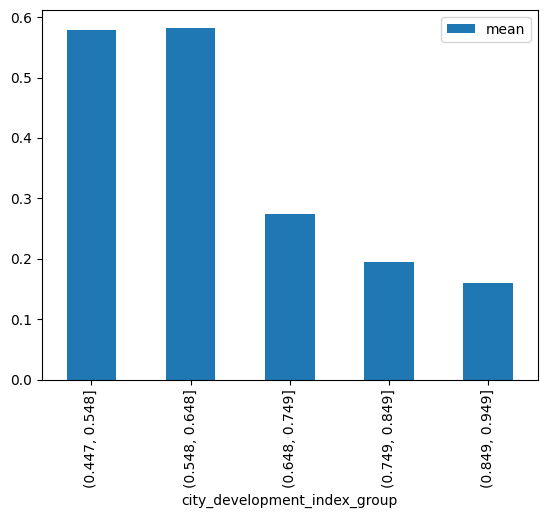

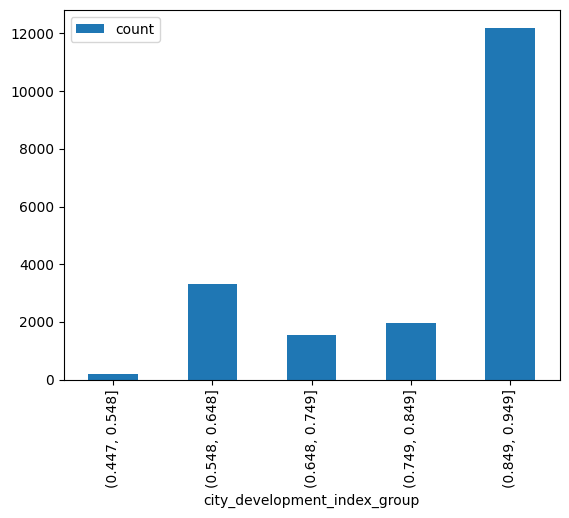

In [29]:
# и строить графики:

df.groupby('city_development_index_group', dropna = False)['target'].agg(['mean']).plot(kind = 'bar')
# дает процент людей для этой группы, которые соответствуют таргету - хотят поменять работу

df.groupby('city_development_index_group', dropna = False)['target'].agg(['count']).plot(kind = 'bar')
# дает количество людей живущих в этих группах

In [102]:
# Есть еще одна функция qcut - которая разбивает данные по количеству людей: qcat


# df['city_development_index_group_q'] = pd.qcut(df['city_development_index'], 5)
# Поскольку очень много повторяющихся значений - возникает ошибка.

In [104]:
# поэтому нужно удалять дубликаты: 

df['city_development_index_group_q'] = pd.qcut(df['city_development_index'], 5, duplicates = 'drop')

In [106]:
df['city_development_index_group_q']

0         (0.878, 0.92]
1        (0.691, 0.878]
2        (0.447, 0.691]
3        (0.691, 0.878]
4        (0.691, 0.878]
              ...      
19153    (0.691, 0.878]
19154     (0.878, 0.92]
19155     (0.878, 0.92]
19156    (0.691, 0.878]
19157    (0.691, 0.878]
Name: city_development_index_group_q, Length: 19158, dtype: category
Categories (4, interval[float64, right]): [(0.447, 0.691] < (0.691, 0.878] < (0.878, 0.92] < (0.92, 0.949]]

In [108]:
df.groupby('city_development_index_group_q', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
city_development_index_group_q,,
"(0.447, 0.691]",3869,0.550530
"(0.691, 0.878]",3827,0.206428
"(0.878, 0.92]",8925,0.178375
"(0.92, 0.949]",2537,0.104454


<Axes: xlabel='city_development_index_group_q'>

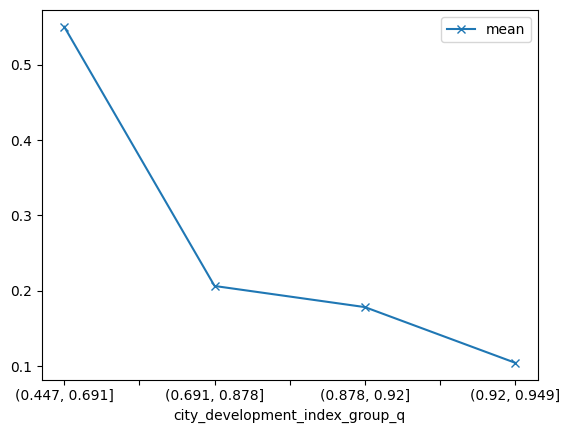

In [110]:
df.groupby('city_development_index_group_q', dropna = False)['target'].agg(['mean']).plot(marker = 'x')

<Axes: xlabel='city_development_index_group_q'>

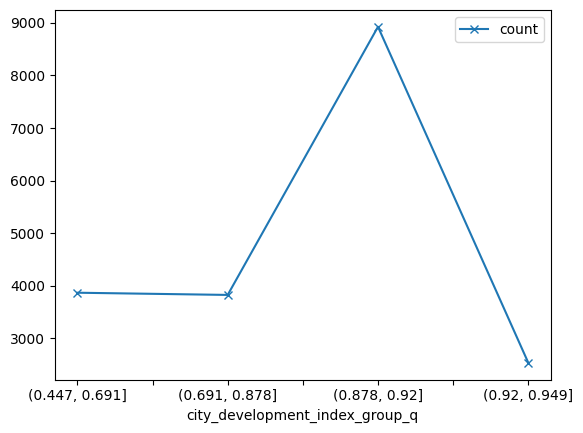

In [112]:
df.groupby('city_development_index_group_q', dropna = False)['target'].agg(['count']).plot(marker = 'x')

In [113]:
# проверяем контрольную сумму:

t = df.groupby('city_development_index_group_q', dropna = False)['target'].agg(['count', 'mean'])
t.sum()

count    19158.000000
mean         1.039787
dtype: float64

In [114]:
len(df)

19158

In [ ]:
# контрольная сумма людей совпадает, несмотря на то, что удалялись дубликаты !? до сих пор не понял как это работает

In [122]:
# можно самому задавать интервалы, так, чтобы удобнее было смотреть:

# df['city_development_index_group'] = pd.cut(df['city_development_index'], 5) 
custom_intervals = pd.cut(df['city_development_index'], [0.1, 0.2, 0.5, float('inf')])

# это искусственный пример разбиения на отрезки от (0.1, 0.2], (0.2, 0.5], (0.5, inf], 
#но показывает как можно задавать свои интервалы

# необходимо учитыывать, что первое значение не включается  и лучше брать от -float('inf')

In [121]:
df.groupby(custom_intervals, dropna = False)['target'].agg(['count', 'mean'])

,count,mean
city_development_index,,
"(0.1, 0.2]",0,NaN
"(0.2, 0.5]",63,0.587302
"(0.5, inf]",19095,0.248233


# Объединение субгрупп в одну группу

In [126]:
# например мы бы хотели объединить High School и Primary School в группу школьников
# и еще Masters и Phd

In [82]:
df.groupby('education_level', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


In [83]:
def education_group(x):
    if x in ['High School', 'Primary School']:
        return 'School'
    elif x in ['Masters', 'Phd']:
        return 'Masters & Phd'
    else:
        return x

In [84]:
df['education_level'].apply(education_group)

0             Graduate
1             Graduate
2             Graduate
3             Graduate
4        Masters & Phd
             ...      
19153         Graduate
19154         Graduate
19155         Graduate
19156           School
19157           School
Name: education_level, Length: 19158, dtype: object

In [111]:
# создаем новый столбец df['new_education_level'] в нашем df
df['new_education_level'] = df['education_level'].apply(education_group)

In [112]:
df.groupby(df['new_education_level'], dropna = False)['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
NaN,460,0.226087


In [87]:
# ту же самую операцию можно делать с помощью replace (или нескольких таких replace):

df['education_level'].replace('Primary School', 'School')

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4            Masters
            ...     
19153       Graduate
19154       Graduate
19155       Graduate
19156    High School
19157         School
Name: education_level, Length: 19158, dtype: object

In [88]:
# таким образом можно написать последовательно несколько replace и получить результат, как с def education_group(x):

df['education_level'].replace('Primary School', 'School').replace('Graduate', 'Hello_yeah')

0         Hello_yeah
1         Hello_yeah
2         Hello_yeah
3         Hello_yeah
4            Masters
            ...     
19153     Hello_yeah
19154     Hello_yeah
19155     Hello_yeah
19156    High School
19157         School
Name: education_level, Length: 19158, dtype: object

In [89]:
# Еще одна возможность поменять название групп - использование словаря {}

# создаем словарь
d = {'Primary School':'Just School', 'Graduate': 'You see this'}

# замэпим словарь
df['education_level'].map(d)

# чтобы некоторые значения не стали nan здесь надо делать полный словарь всех названий

0        You see this
1        You see this
2        You see this
3        You see this
4                 NaN
             ...     
19153    You see this
19154    You see this
19155    You see this
19156             NaN
19157     Just School
Name: education_level, Length: 19158, dtype: object

# Более сложная логика, когда функция, которую мы создаем - использует несколько столбцов. Функция с несколькими столбцами

In [ ]:
# условие заполнения нового столбца, которое требует участие других столбцов - и применяется эта функция 
# уже не к одному столбцу, а ко всему датафрейму

In [ ]:
# задача. пример:

# в нашем датафрейме df категория phd неправильно указали параметр trainung_hours и им надо накинуть по +1000

In [90]:
# задаем функцию

def new_training_hours(row):
    if row['education_level'] == 'Phd':
        return row['training_hours'] + 1000
    else:
        return row['training_hours']

In [91]:
# добавляем новый столбец в df

df['new_training_hours'] = df.apply(new_training_hours, axis = 1)

In [92]:
df[df['education_level'] == 'Phd']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_group,new_training_hours,new_education_level
37,10164,"(0.849, 0.949]",0.926,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,4,42,1.0,"(0.849, 0.949]",1042,Masters & Phd
121,13915,"(0.849, 0.949]",0.910,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,2,20,1.0,"(0.849, 0.949]",1020,Masters & Phd
130,3921,"(0.849, 0.949]",0.893,NaN,No relevent experience,no_enrollment,Phd,STEM,>20,1000-4999,Public Sector,>4,4,0.0,"(0.849, 0.949]",1004,Masters & Phd
135,23947,"(0.849, 0.949]",0.920,NaN,No relevent experience,no_enrollment,Phd,STEM,NaN,NaN,NaN,NaN,70,0.0,"(0.849, 0.949]",1070,Masters & Phd
152,31786,"(0.849, 0.949]",0.920,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,>4,14,0.0,"(0.849, 0.949]",1014,Masters & Phd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,1477,"(0.749, 0.849]",0.767,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,10000+,Pvt Ltd,1,34,0.0,"(0.749, 0.849]",1034,Masters & Phd
18800,18365,"(0.849, 0.949]",0.920,Male,Has relevent experience,no_enrollment,Phd,STEM,15,50-99,Funded Startup,4,108,0.0,"(0.849, 0.949]",1108,Masters & Phd
18807,229,"(0.849, 0.949]",0.926,Male,No relevent experience,no_enrollment,Phd,STEM,14,5000-9999,Public Sector,>4,9,1.0,"(0.849, 0.949]",1009,Masters & Phd
18944,2678,"(0.849, 0.949]",0.924,NaN,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,NaN,27,0.0,"(0.849, 0.949]",1027,Masters & Phd


In [77]:
# можно делать то же с loc, но это не рекомендуется:

# df['new_training_hours'] = df['training_hours']
# df.loc[df['education_level'] == 'Phd', 'new_training_hours'] += 1000

# Функция Pivot Table (она используется реже чем обычный groupby)

In [94]:
# делаем группировку по столбцу df['new_education_level'] с ориентацией на таргет

df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'])

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097


In [113]:
# В отличае от функции groupby здесь нет nan


df.groupby(df['new_education_level'], dropna = False)['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
NaN,460,0.226087


In [114]:
# Если мы зададим для df.pivot_table... параметр dropna=False - из расчета просто удаляться столбцы в которых все  с nan: (???)

df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'], dropna = False)

# сами значнеия остануться

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097


In [115]:
# для того, чтобы отобразить строки с nan - надо вручную заполнить строки с nan:

df['new_education_level'] = df['new_education_level'].fillna('no_info')

In [116]:
df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'])

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [ ]:
# здесь для pivot_table возникает проблема мульти индексации столбцов. переименовать их и сделать одним
# поможет код по запрос flatten_multiindex: 

https://stackoverflow.com/questions/14507794/how-to-flatten-a-hierarchical-index-in-columns

# df.columns = [' '.join(col).strip() for col in df.columns.values]

In [121]:
# для демонстрации:

t = df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'])

In [124]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [125]:
t

,count_target,mean_target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [136]:
# также полезно избавляться от индекса в строках:

t.reset_index()

,new_education_level,count_target,mean_target
0,Graduate,11598,0.279790
1,Masters & Phd,4775,0.207958
2,School,2325,0.187097
3,no_info,460,0.226087


In [126]:
# у pivot_table есть очень крутая фича:

# добавлять столбцы для группироуки в сводную таблицу и оценивать уже комбинацию признаков

# например: здесь идет оценка уровня образования для таргет = 1 или 0
df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'])

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [127]:
# здесь добавим признак по которому хотим дополнительно группировать 'gender':

df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['count', 'mean'])

count                  mean                    
gender              Female  Male Other    Female      Male     Other
new_education_level                                                 
Graduate               773  8144   112  0.279431  0.257122  0.330357
Masters & Phd          386  3237    31  0.233161  0.186284  0.096774
School                  71  1598    39  0.267606  0.171464  0.205128
no_info                  8   242     9  0.125000  0.169421  0.222222

In [128]:
# groupby может запускать новые признаки в строки, а в стоблцы не может:
# вот исходный вариант:
df.groupby(df['new_education_level']) ['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [135]:
# вот группировка с доп.параметрами:
df.groupby(['new_education_level','gender'], dropna = False) ['target'].agg(['count', 'mean'])

count      mean
new_education_level gender                 
Graduate            Female    773  0.279431
                    Male     8144  0.257122
                    Other     112  0.330357
                    NaN      2569  0.349552
Masters & Phd       Female    386  0.233161
                    Male     3237  0.186284
                    Other      31  0.096774
                    NaN      1121  0.264942
School              Female     71  0.267606
                    Male     1598  0.171464
                    Other      39  0.205128
                    NaN       617  0.217180
no_info             Female      8  0.125000
                    Male      242  0.169421
                    Other       9  0.222222
                    NaN       201  0.298507

In [139]:
# убрать мульти индекс пригодится также при работе с groupby (смотри выше)

# это пригодится, когда целевой параметр не только ['target']:

df.groupby(['new_education_level'], dropna = False) [['target', 'city_development_index']].agg(['count', 'mean'])


target           city_development_index          
                     count      mean                  count      mean
new_education_level                                                  
Graduate             11598  0.279790                  11598  0.823731
Masters & Phd         4775  0.207958                   4775  0.840032
School                2325  0.187097                   2325  0.836080
no_info                460  0.226087                    460  0.805207

In [ ]:
# в данном случае появляется мультииндекс, который можно полечить с помощью:

# https://stackoverflow.com/questions/14507794/how-to-flatten-a-hierarchical-index-in-columns

# df.columns = [' '.join(col).strip() for col in df.columns.values]


In [140]:
# для примера здесь:
t = df.groupby(['new_education_level'], dropna = False) [['target', 'city_development_index']].agg(['count', 'mean'])

In [141]:
t.columns = [' '.join(col).strip() for col in t.columns.values]

In [144]:
t.reset_index()

,new_education_level,target count,target mean,city_development_index count,city_development_index mean
0,Graduate,11598,0.279790,11598,0.823731
1,Masters & Phd,4775,0.207958,4775,0.840032
2,School,2325,0.187097,2325,0.836080
3,no_info,460,0.226087,460,0.805207


In [ ]:
#### Чаще всего pivot_table используется тогда, когда надо сделать HEATMAP

# Heatmap

In [146]:
df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['mean'])

mean                    
gender                 Female      Male     Other
new_education_level                              
Graduate             0.279431  0.257122  0.330357
Masters & Phd        0.233161  0.186284  0.096774
School               0.267606  0.171464  0.205128
no_info              0.125000  0.169421  0.222222

In [151]:
# заполним пропуски в значениях по столбцу гендер
df['gender'] = df['gender'].fillna('no_info')

In [152]:
df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['mean'])

mean                              
gender                 Female      Male     Other   no_info
new_education_level                                        
Graduate             0.279431  0.257122  0.330357  0.349552
Masters & Phd        0.233161  0.186284  0.096774  0.264942
School               0.267606  0.171464  0.205128  0.217180
no_info              0.125000  0.169421  0.222222  0.298507

In [153]:
# создадим из этого отдельно табличку t под heatmap:

t = df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['mean'])

In [154]:
import seaborn as sns

<Axes: xlabel='None-gender', ylabel='new_education_level'>

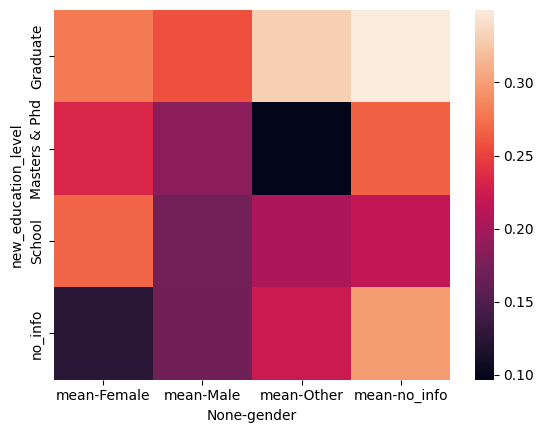

In [159]:
sns.heatmap(t)

In [ ]:
# Чтобы задать метку для оси x (горизонтальной оси) в тепловой карте, необходимо добавить параметр xlabel 
# после вызова функции sns.heatmap(). Для того чтобы правильно задать метку 'gender', необходимо сделать следующее:
    
# В этом примере мы используем функцию plt.xlabel() из библиотеки Matplotlib для установки метки для оси x. 
# Обратите внимание, что мы также добавляем метку для оси y с помощью plt.ylabel(). 
# Не забудьте вызвать plt.show() в конце, чтобы отобразить график.
    
import seaborn as sns
import matplotlib.pyplot as plt

t = ... # ваш набор данных

sns.heatmap(t)
plt.xlabel('gender') # добавляем метку для оси x
plt.ylabel('new_education_level') # добавляем метку для оси y
plt.show() # отображаем график


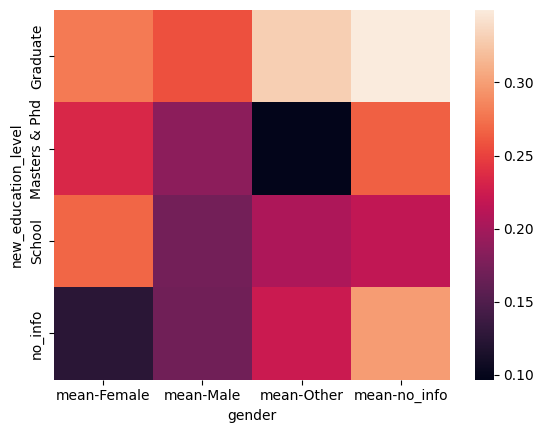

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(t)
plt.xlabel('gender') # добавляем метку для оси x
plt.ylabel('new_education_level') # добавляем метку для оси y
plt.show() # отображаем график

# And now: CORRELATION & Phi K

In [ ]:
...